In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [6]:
df = pd.read_csv("pre_flop_adjusted.txt")

In [7]:
df

,i_value,j_value,distance,suited,ratio
0,0,1,1,1,0.41542
1,0,2,2,1,0.36981
2,0,3,3,1,0.42712
3,0,4,4,1,0.44498
4,0,5,5,1,0.42635
...,...,...,...,...,...
320,9,11,2,1,0.57864
321,9,12,3,1,0.65998
322,10,11,1,1,0.60086
323,10,12,2,1,0.67665


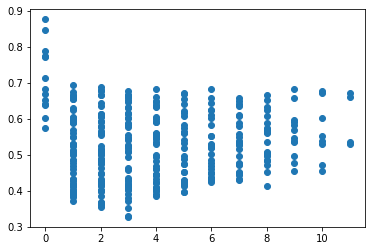

In [27]:
plt.scatter(df.distance, df.ratio)

<BarContainer object of 325 artists>

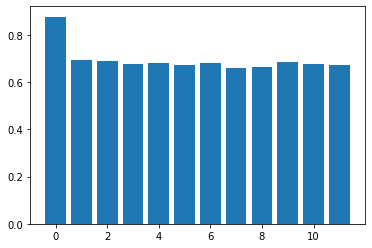

In [12]:
plt.bar(df.distance, df.ratio)

In [9]:
np.asarray(df.distance).max()

11

In [13]:
df_X = df.drop(["ratio"], axis = 1)

In [14]:
df_X

,i_value,j_value,distance,suited
0,0,1,1,1
1,0,2,2,1
2,0,3,3,1
3,0,4,4,1
4,0,5,5,1
...,...,...,...,...
320,9,11,2,1
321,9,12,3,1
322,10,11,1,1
323,10,12,2,1


In [156]:
X_train, X_test, y_train, y_test = tts(df_X, df.ratio, test_size = 0.2)

In [157]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [17]:
LR.score(X_test, y_test)

0.29351900852405144

In [153]:
coefs = LR.coef_

In [158]:
coefs

array([ 0.00939578,  0.00967489, -0.00013505,  0.03048827])

In [25]:
len(coefs)

4

<BarContainer object of 4 artists>

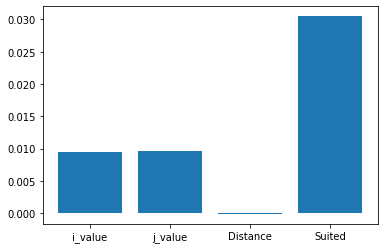

In [161]:
plt.bar(range(len(coefs)),coefs, tick_label = ['i_value', 'j_value', 'Distance', 'Suited'])

In [38]:
Ace_i = pd.DataFrame(df[df.i_value == 12])
Ace_j = pd.DataFrame(df[df.j_value == 12])
dfs = [Ace_i, Ace_j]
Ace = pd.concat(dfs)

King_i = pd.DataFrame(df[df.i_value == 11])
King_j = pd.DataFrame(df[df.j_value == 11])
dfs = [King_i, King_j]
King = pd.concat(dfs)

Queen_i = pd.DataFrame(df[df.i_value == 10])
Queen_j = pd.DataFrame(df[df.j_value == 10])
dfs = [Queen_i, Queen_j]
Queen = pd.concat(dfs)

Jack_i = pd.DataFrame(df[df.i_value == 9])
Jack_j = pd.DataFrame(df[df.j_value == 9])
dfs = [Jack_i, Jack_j]
Jack = pd.concat(dfs)

Ten_i = pd.DataFrame(df[df.i_value == 8])
Ten_j = pd.DataFrame(df[df.j_value == 8])
dfs = [Ten_i, Ten_j]
Ten = pd.concat(dfs)

Nine_i = pd.DataFrame(df[df.i_value == 7])
Nine_j = pd.DataFrame(df[df.j_value == 7])
dfs = [Nine_i, Nine_j]
Nine = pd.concat(dfs)


Eight_i = pd.DataFrame(df[df.i_value == 6])
Eight_j = pd.DataFrame(df[df.j_value == 6])
dfs = [Eight_i, Eight_j]
Eight = pd.concat(dfs)

Seven_i = pd.DataFrame(df[df.i_value == 5])
Seven_j = pd.DataFrame(df[df.j_value == 5])
dfs = [Seven_i, Seven_j]
Seven = pd.concat(dfs)

Six_i = pd.DataFrame(df[df.i_value == 4])
Six_j = pd.DataFrame(df[df.j_value == 4])
dfs = [Six_i, Six_j]
Six = pd.concat(dfs)

Five_i = pd.DataFrame(df[df.i_value == 3])
Five_j = pd.DataFrame(df[df.j_value == 3])
dfs = [Five_i, Five_j]
Five = pd.concat(dfs)

Four_i = pd.DataFrame(df[df.i_value == 2])
Four_j = pd.DataFrame(df[df.j_value == 2])
dfs = [Four_i, Four_j]
Four = pd.concat(dfs)

Three_i = pd.DataFrame(df[df.i_value == 1])
Three_j = pd.DataFrame(df[df.j_value == 1])
dfs = [Three_i, Three_j]
Three = pd.concat(dfs)

Two_i = pd.DataFrame(df[df.i_value == 0])
Two_j = pd.DataFrame(df[df.j_value == 0])
dfs = [Two_i, Two_j]
Two = pd.concat(dfs)



In [41]:
Ace.shape

(50, 5)

In [42]:
Two.shape

(50, 5)

In [51]:
def find_plot_LinReg(dataframe, card_value):
    dataframe_X = dataframe.drop(["ratio"], axis = 1)
    X_train_plot, X_test_plot, y_train_plot, y_test_plot = tts(dataframe_X, dataframe.ratio, test_size = 0.2)
    LR_card = LinearRegression()
    LR_card.fit(X_train_plot, y_train_plot)
    print("score is: ", LR_card.score(X_test_plot, y_test_plot))
    coefs = LR_card.coef_
    plt.bar(range(len(coefs)), coefs, tick_label = ['i_value', 'j_value', 'distance', 'suited'])
    plt.title(card_value)
    plt.show()
    return coefs

score is:  -0.40037791106886544


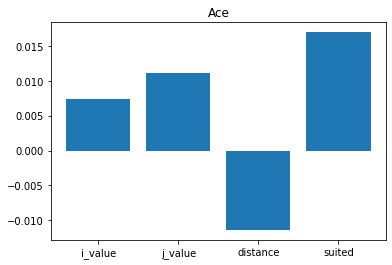

In [123]:
Ace_C = find_plot_LinReg(Ace,"Ace")

score is:  -0.0036109075562003046


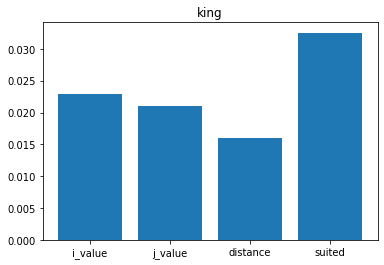

In [147]:
King_C = find_plot_LinReg(King, "king")

score is:  -0.7767044137518344


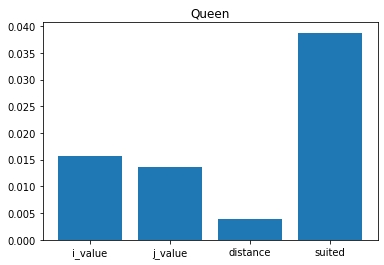

In [55]:
Queen_C = find_plot_LinReg(Queen, "Queen")

score is:  -0.2812078946140655


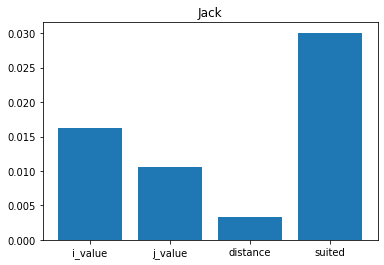

In [56]:
Jack_C = find_plot_LinReg(Jack, "Jack")

score is:  0.11033188314650122


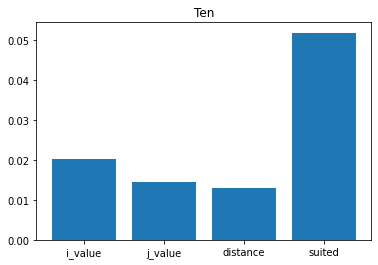

In [57]:
Ten_C = find_plot_LinReg(Ten, "Ten")

score is:  -0.2590599338593449


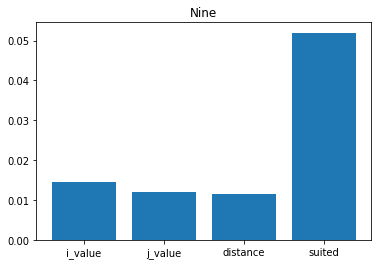

In [58]:
Nine_C = find_plot_LinReg(Nine, "Nine")

score is:  0.28688477275020163


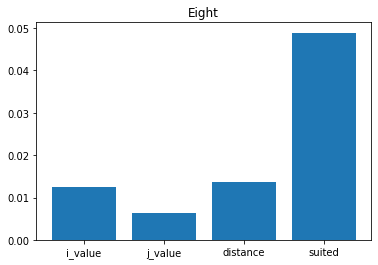

In [59]:
Eight_C = find_plot_LinReg(Eight, "Eight")

score is:  -0.07183280809914572


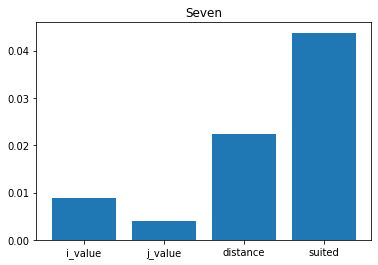

In [60]:
Seven_C = find_plot_LinReg(Seven, "Seven")

score is:  0.5149070188813101


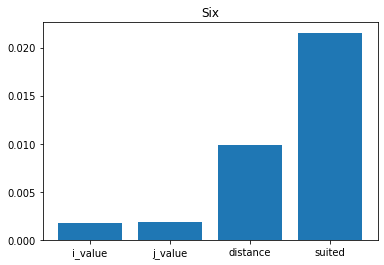

In [61]:
Six_C = find_plot_LinReg(Six, "Six")

score is:  0.2921385406568616


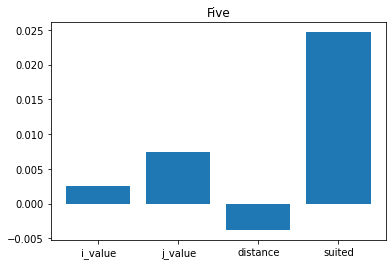

In [62]:
Five_C = find_plot_LinReg(Five, "Five")

score is:  -0.014187348622529239


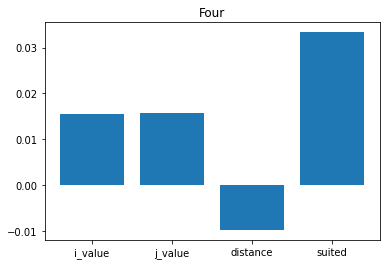

In [63]:
Four_C = find_plot_LinReg(Four, "Four")

score is:  -0.11710214269577301


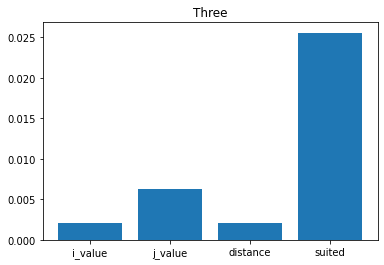

In [64]:
Three_C = find_plot_LinReg(Three, "Three")

score is:  0.12290930968795977


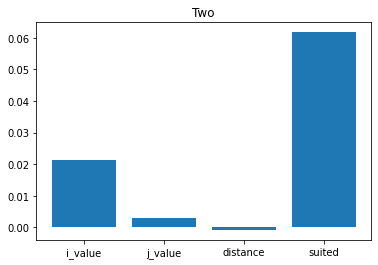

In [65]:
Two_C = find_plot_LinReg(Two, "Two")

In [68]:
cards = [Ace, King, Queen, Jack, Ten, Nine, Eight, Seven, Six, Five, Four, Three, Two]
distances = []
suited = []
for c in cards:
    distances.append(c.coef_[2])
    suited.append(c.coef_[3])

AttributeError: 'DataFrame' object has no attribute 'coef_'